## Alireza Farajtabrizi (97102185) and Mohmmadreza Alimohammadi (97102106) Lab1


In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#importing libraries 
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt
import os

In [3]:
#to plot the eigen vectors I have to scale it from -1-1 to 0-255
def scaler(data,smax):
    return smax*((data - np.min(data)) / (np.max(data) - np.min(data)))

### Loading Data, Reshaping, and Train-Test Splitting

In [4]:
from os import listdir
from skimage import io

# get the path/directory
folder_dir = 'Neutral'
images = []

for file in os.listdir(folder_dir):
        img=io.imread(folder_dir+'/'+file,as_gray=True)
        N1=img.shape[0]
        N2=img.shape[1]
        img=img.reshape(img.shape[0]*img.shape[1])
        images.append(img)
   
images=np.array(images)

In [5]:
#spliting data fro train and test
train_set = images[0:140]
test_set  = images[140:]

### Displaying Eigen Faces

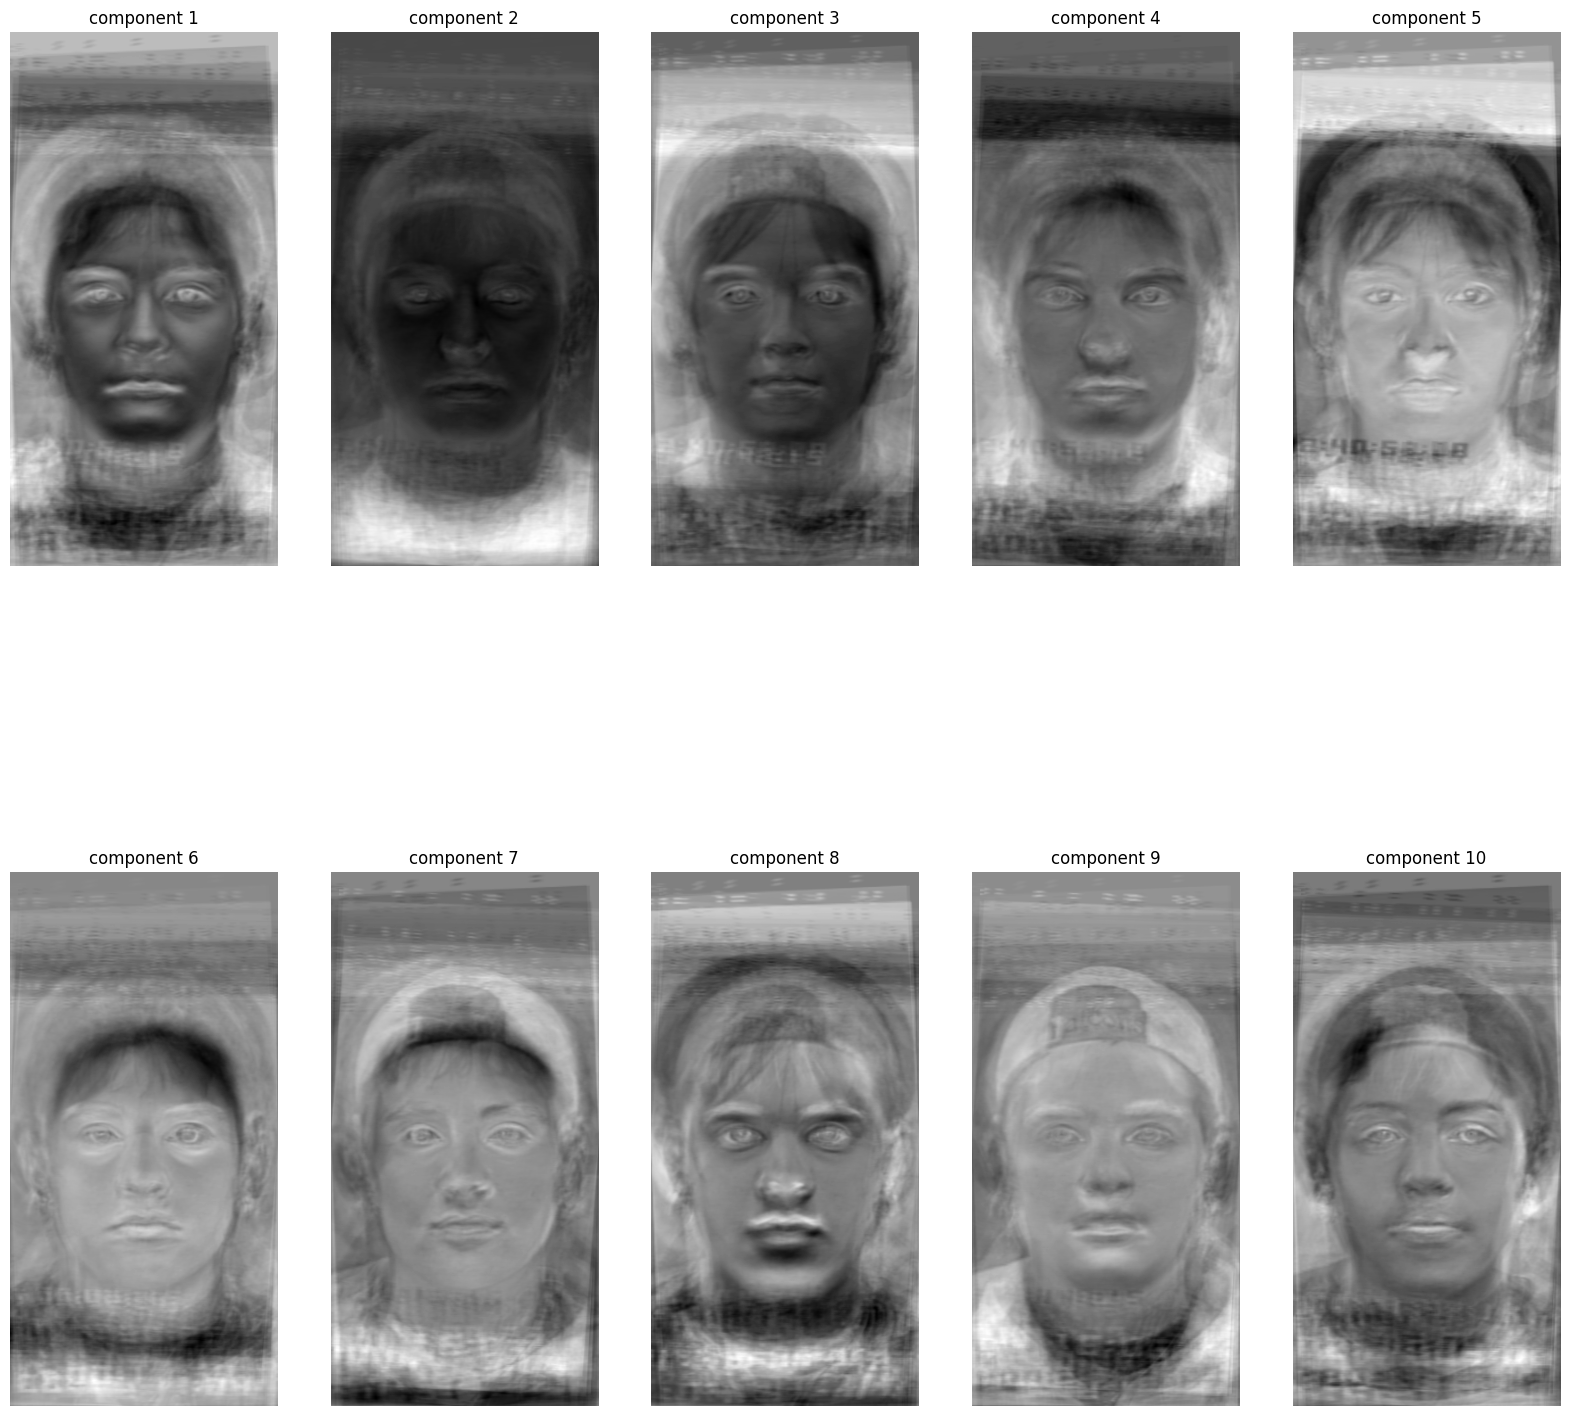

In [6]:
from sklearn.decomposition import PCA
#using sklearn PCA function to get eigen vectors  
n=10

pca = PCA(n_components=n)
pca.fit(train_set)

#ploting 10 eigen vectors
plt.figure(figsize=(20,20))  
for i in range(pca.components_.shape[0]):
    img=pca.components_[i]
    img=scaler(img,255)
    img=img.reshape(N1,N2)
    
    plt.subplot(2, 5, i+1)
    plt.title('component '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

### Photo Reconstruction with 10 Components

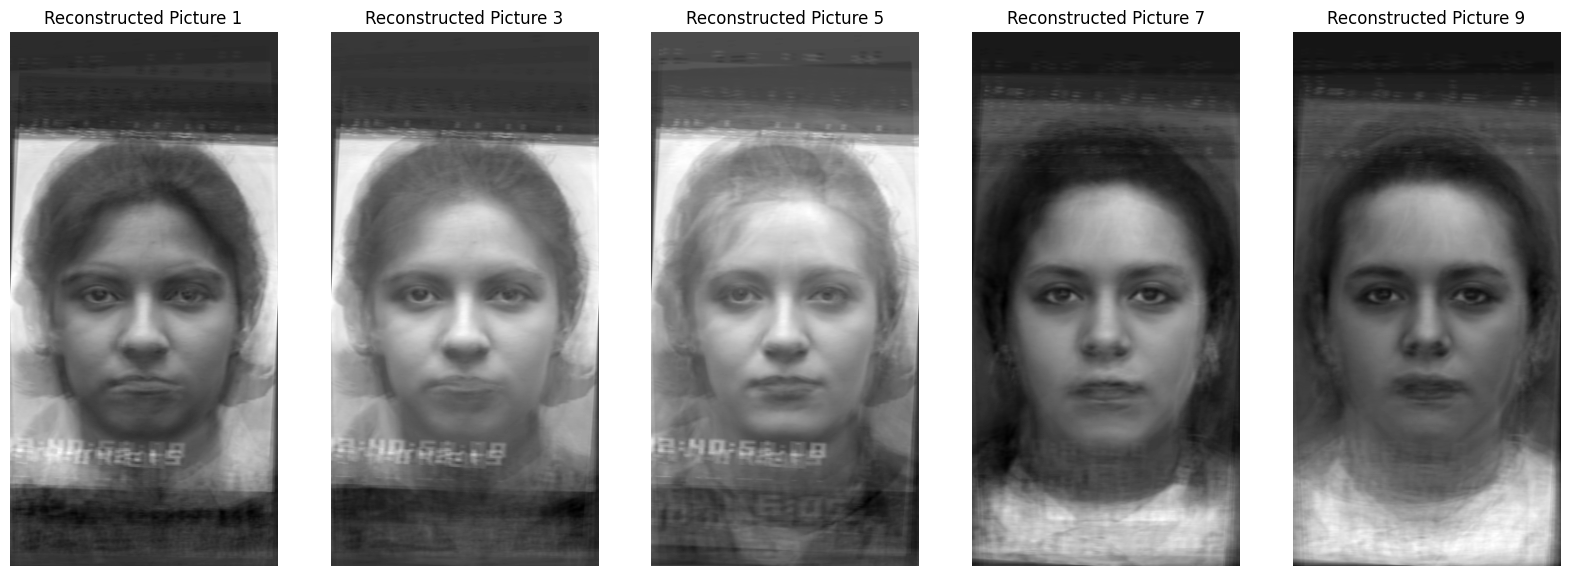

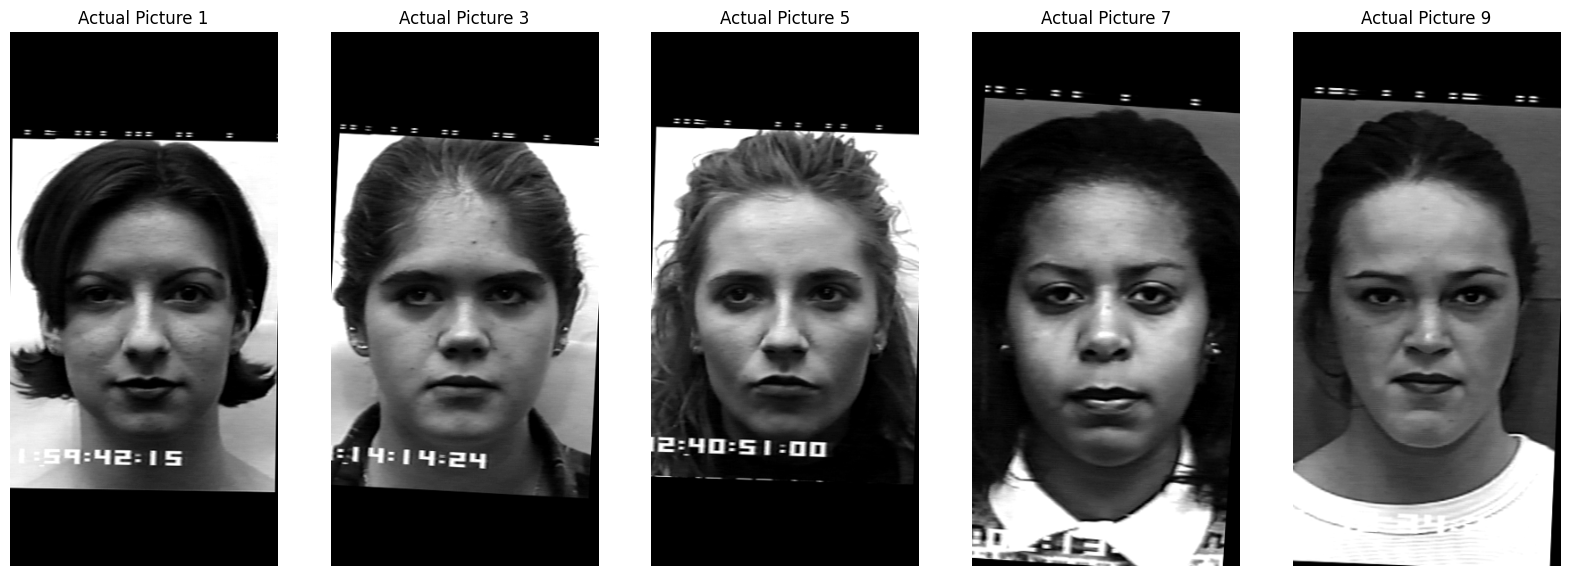

In [7]:
#using pca to project pictures on the eigen vectors and then the inverse transform to reconstruct
X=pca.transform(train_set)   
Y=pca.inverse_transform(X)


#ploting the original and the recontructed photo
plt.figure(figsize=(20,10))   
for i in range(0,10,2):
    img=Y[i].reshape(N1,N2)
    plt.subplot(1, 5, int(i/2)+1)
    plt.title('Reconstructed Picture '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.figure(figsize=(20,10))   
for i in range(0,10,2):
    img=train_set[i].reshape(N1,N2)
    plt.subplot(1, 5, int(i/2)+1)
    plt.title('Actual Picture '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

### Photo Reconstruction with 20 Components

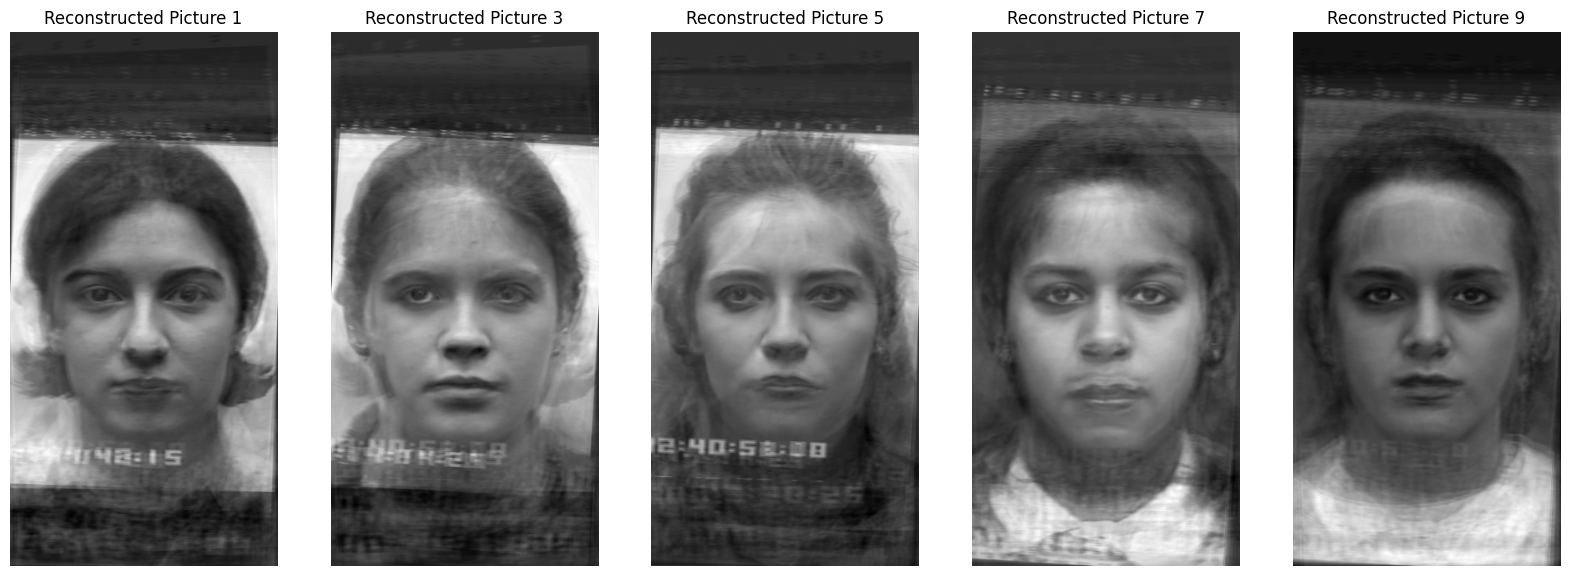

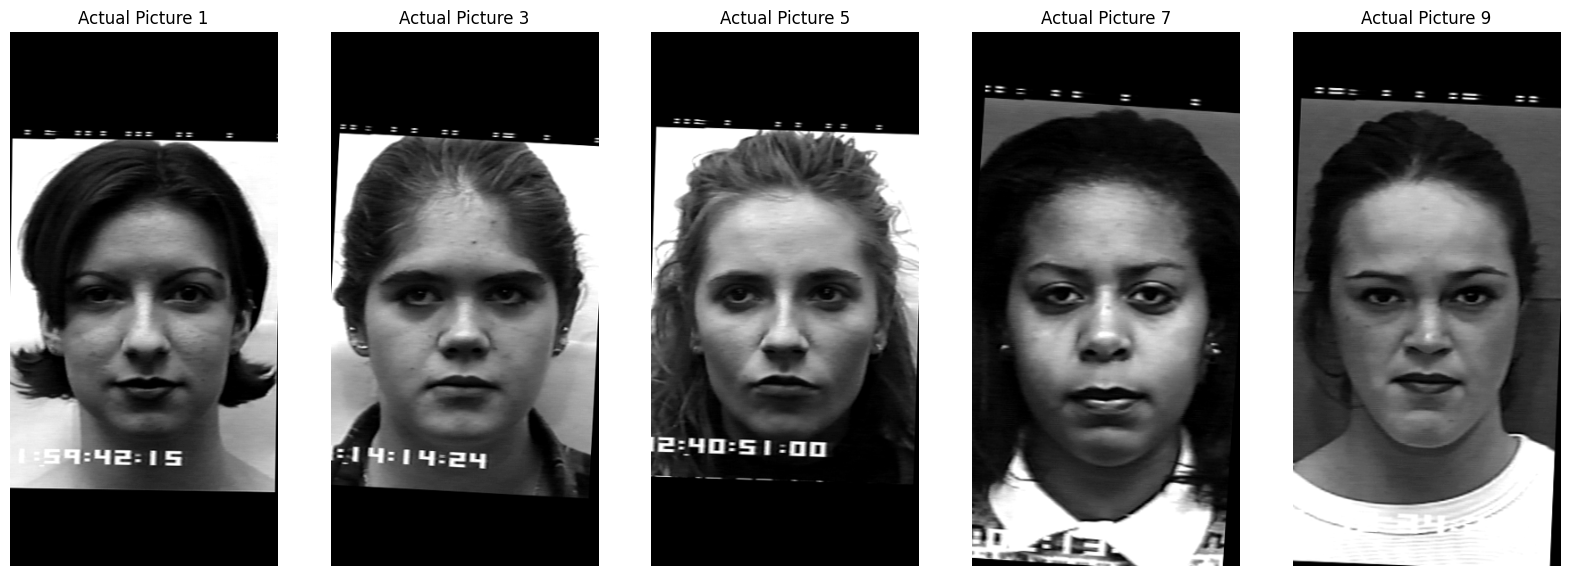

In [8]:
#doing the same thing as last part only with 20 components
n=20

pca = PCA(n_components=n)
pca.fit(train_set)
X=pca.transform(train_set)   
Y=pca.inverse_transform(X)


#ploting the original and the recontructed photo
plt.figure(figsize=(20,10))   
for i in range(0,10,2):
    img=Y[i].reshape(N1,N2)
    plt.subplot(1, 5, int(i/2)+1)
    plt.title('Reconstructed Picture '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')    

plt.figure(figsize=(20,10))   
for i in range(0,10,2):
    img=train_set[i].reshape(N1,N2)
    plt.subplot(1, 5, int(i/2)+1)
    plt.title('Actual Picture '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

### همان‌طور که از مقایسه نتایج دو قسمت قبل مشهود است، بازسازی با فقط ۱۰ مقدار ويژه فقط دهان و چشم‌ها را به خوبی بازسازی می‌کند و بقیه‌ی اجزای صورت با تصویر اصلی مطابقت ندارد و یا تار است. در حالی که به هنگام بازسازی با ۲۰ مقدار ویژه صورت تا حد خوبی بازسازی می‌شود. این با شهود ما که چشم و دهان مهم‌ترین پخش صورت و متفاوت در بین چهره‌ها هست هم‌خوانی دارد و اجزای بعدی صورت در درجه بعدی اهمیت قرار دارند. همچنین در هر دو حالت پس‌زمینه و موها تار است

### Test Data Reconstruction

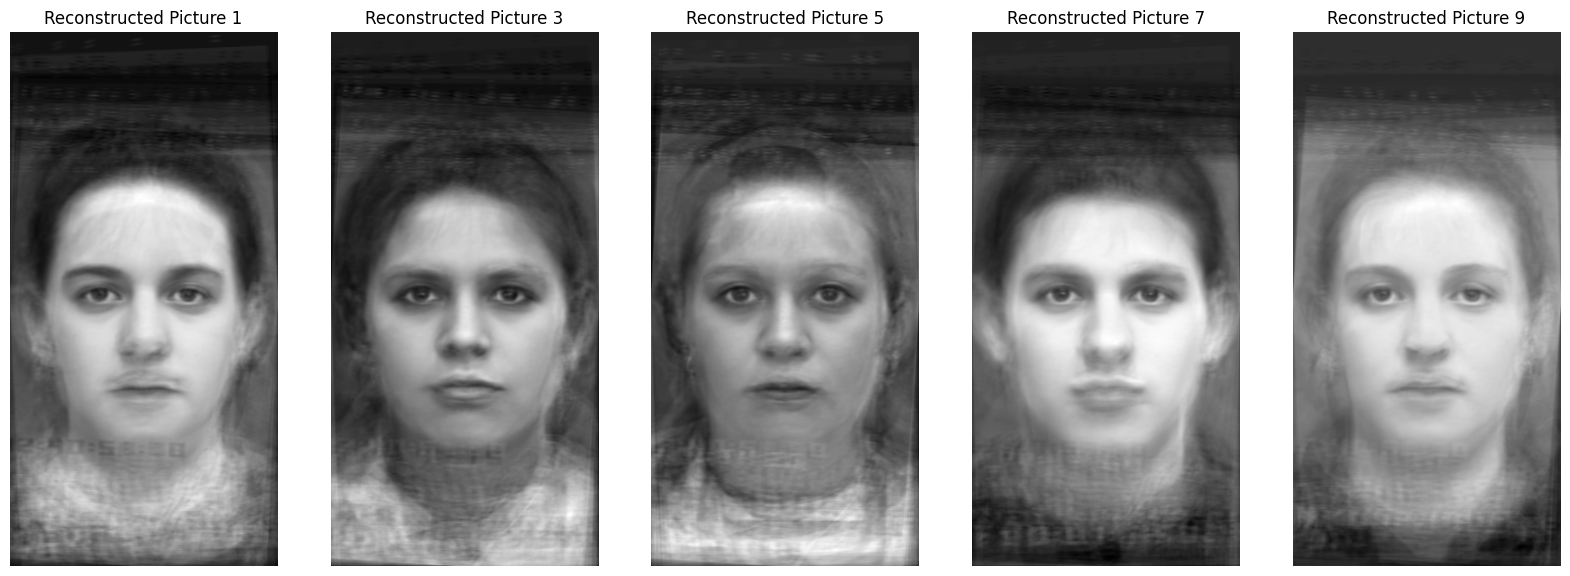

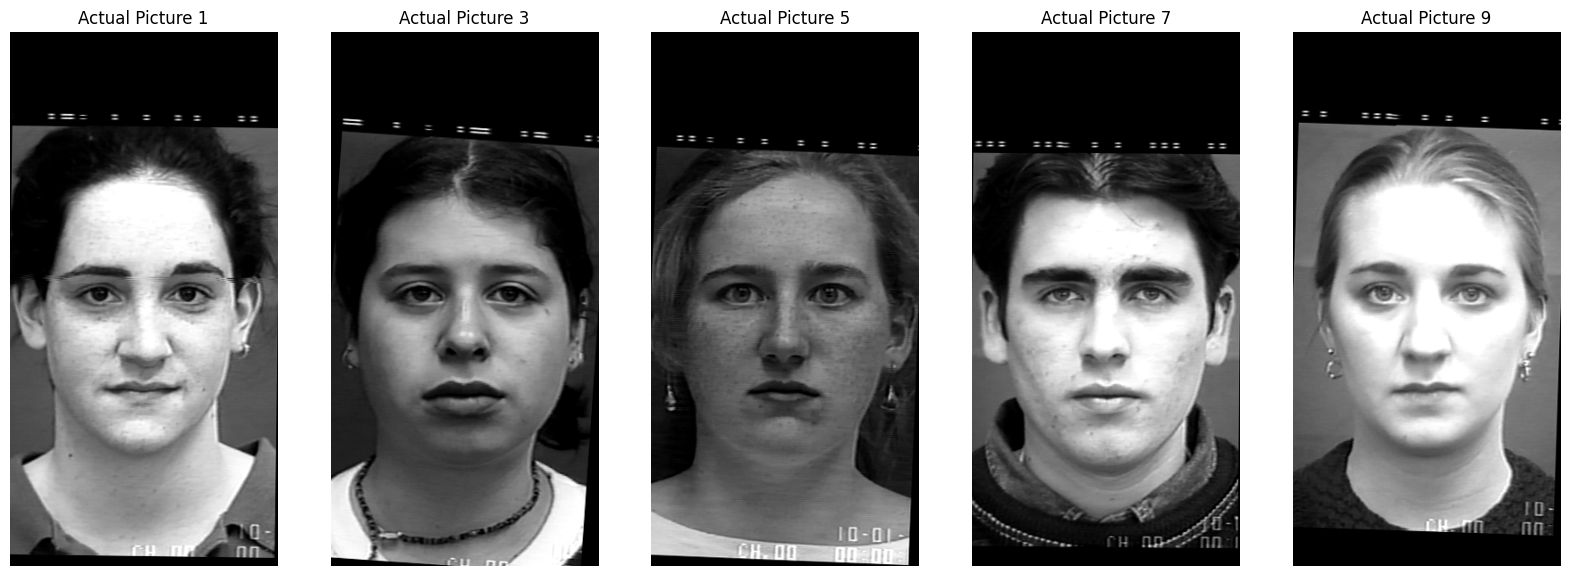

In [9]:
#to test the machine we project some picture from test set to egien vectors that are fitted to train set and then inverse it to see the result
X=pca.transform(test_set)   
Y=pca.inverse_transform(X)

plt.figure(figsize=(20,10))   
for i in range(0,10,2):
    img=Y[i].reshape(N1,N2)
    plt.subplot(1, 5, int(i/2)+1)
    plt.title('Reconstructed Picture '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.figure(figsize=(20,10))   
for i in range(0,10,2):
    img=test_set[i].reshape(N1,N2)
    plt.subplot(1, 5, int(i/2)+1)
    plt.title('Actual Picture '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

### همان‌طور که در تصاویر بالا قابل مشاهده است، خطای بازسازی به طور مشهودی بیشتر است و حتی در حوالی دهن، که در قسمت قبل تا حد خوبی بازسازی می‌شد، تصاویر محو هستند. دلیل این آن است که مقادیر ویژه با استفاده از تصاویر تمرین ساخته شده و با آن‌ها همبستگی و وابستگی آماری دارند. در حالی که تصاویر از تصاویر تست مستقل هستند و طبیعی است که بر روی این تصاویر خطای بیشتری داشته باشند.

### Loading new Data then Projecting and Reconstructing, Other Subspaces

In [10]:
#making 4 arrays for each feeling subspace and then reshape them to vectors
folder_dir = 'Neutral'
norm_img = []
for file in os.listdir(folder_dir):
        img=io.imread(folder_dir+'/'+file,as_gray=True)
        N1=img.shape[0]
        N2=img.shape[1]
        img=img.reshape(img.shape[0]*img.shape[1])
        norm_img.append(img)      
norm_img=np.array(norm_img)
print(norm_img.shape)

folder_dir = 'Disgust'
disg_img = []
for file in os.listdir(folder_dir):
        img=io.imread(folder_dir+'/'+file,as_gray=True)
        N1=img.shape[0]
        N2=img.shape[1]
        img=img.reshape(img.shape[0]*img.shape[1])
        disg_img.append(img)      
disg_img=np.array(disg_img)
print(disg_img.shape)

folder_dir = 'Happy'
hap_img = []
for file in os.listdir(folder_dir):
        img=io.imread(folder_dir+'/'+file,as_gray=True)
        N1=img.shape[0]
        N2=img.shape[1]
        img=img.reshape(img.shape[0]*img.shape[1])
        hap_img.append(img)      
hap_img=np.array(hap_img)
print(hap_img.shape)

folder_dir = 'Surprise'
sup_img = []
for file in os.listdir(folder_dir):
        img=io.imread(folder_dir+'/'+file,as_gray=True)
        N1=img.shape[0]
        N2=img.shape[1]
        img=img.reshape(img.shape[0]*img.shape[1])
        sup_img.append(img)      
sup_img=np.array(sup_img)
print(sup_img.shape)

(190, 180000)
(47, 180000)
(85, 180000)
(88, 180000)


True

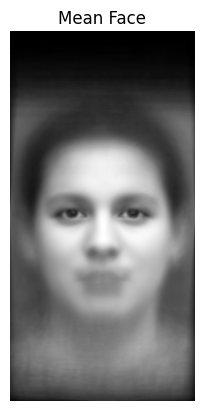

In [11]:
#in order to make a mask I calculate the mean face of all data and then I make 3 mask from that
m1=np.mean(norm_img, axis=0)
m2=np.mean(disg_img, axis=0)
m3=np.mean(hap_img, axis=0)
m4=np.mean(sup_img, axis=0)
mean_img=(0.190*m1+0.047*m2+0.085*m3+0.088*m4)/(0.190+0.047+0.085+0.088)
mean_img=mean_img.reshape(N1,N2)

plt.figure()
plt.imshow(mean_img, cmap='gray')
plt.title('Mean Face')
plt.axis('off')
cv2.imwrite('mean_face.jpg',mean_img)

### Using a Mask

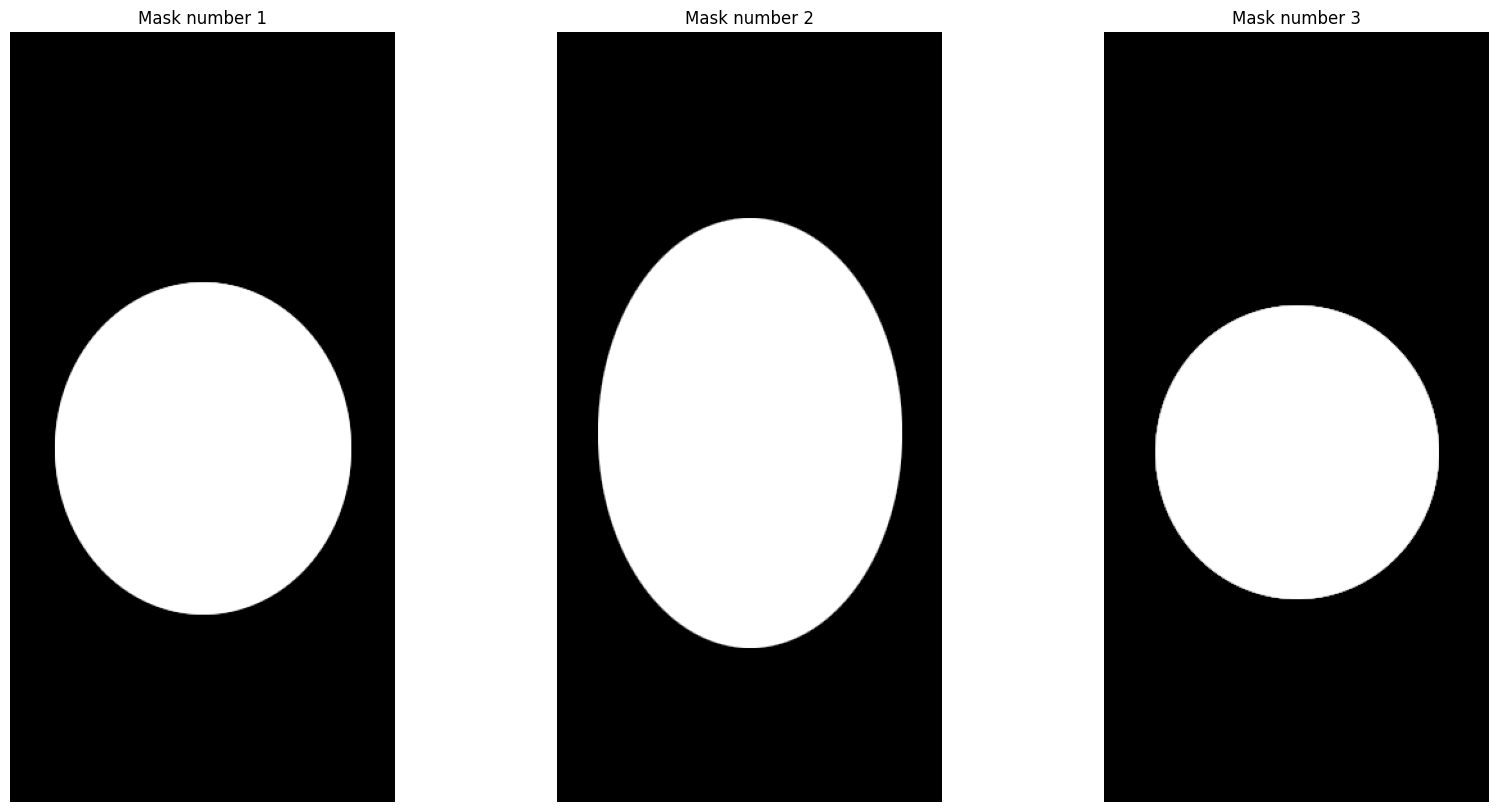

In [12]:
#loading the masks that I made with photoshop
folder_dir = 'Masks'
masks_img = []
for file in os.listdir(folder_dir):
        img=io.imread(folder_dir+'/'+file,as_gray=True)
        N1=img.shape[0]
        N2=img.shape[1]
        img=img.reshape(img.shape[0]*img.shape[1])
        masks_img.append(img)      
masks_img=np.array(masks_img)

#plotting the masks 
plt.figure(figsize=(20,10))   
for i in range(3):
    img=masks_img[i].reshape(N1,N2)
    plt.subplot(1, 3, i+1)
    plt.title('Mask number '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

In [13]:
#in order to test diffrent scenarios you can change n for components and k for another mask 
n=20
k=0

#I have to make a copy of each picture to save the original one from being effected by a mask
norm_img_m=np.zeros(norm_img.shape)
#need to add 1 more dimension to match the bitwise_and argument
norm_img_m=norm_img_m.reshape(norm_img.shape[0],norm_img.shape[1],1)
for i in range(norm_img.shape[0]):
    norm_img_m[i]=cv2.bitwise_and(norm_img[i],norm_img[i],mask = masks_img[k])
norm_img_m=norm_img_m.reshape(norm_img.shape[0],norm_img.shape[1])
#fit the masked version to the model
pca_norm = PCA(n_components=n)
pca_norm.fit(norm_img_m)



disg_img_m=np.zeros(disg_img.shape)
disg_img_m=disg_img_m.reshape(disg_img.shape[0],disg_img.shape[1],1)
for i in range(disg_img.shape[0]):
    disg_img_m[i]=cv2.bitwise_and(disg_img[i],disg_img[i],mask = masks_img[k])
disg_img_m=disg_img_m.reshape(disg_img.shape[0],disg_img.shape[1])

pca_disg = PCA(n_components=n)
pca_disg.fit(disg_img_m)



hap_img_m=np.zeros(hap_img.shape)
hap_img_m=hap_img_m.reshape(hap_img.shape[0],hap_img.shape[1],1)
for i in range(hap_img.shape[0]):
    hap_img_m[i]=cv2.bitwise_and(hap_img[i],hap_img[i],mask = masks_img[k])
hap_img_m=hap_img_m.reshape(hap_img.shape[0],hap_img.shape[1])

pca_hap = PCA(n_components=n)
pca_hap.fit(hap_img_m)



sup_img_m=np.zeros(sup_img.shape)
sup_img_m=sup_img_m.reshape(sup_img.shape[0],sup_img.shape[1],1)
for i in range(sup_img.shape[0]):
    sup_img_m[i]=cv2.bitwise_and(sup_img[i],sup_img[i],mask = masks_img[k])
sup_img_m=sup_img_m.reshape(sup_img.shape[0],sup_img.shape[1])

pca_sup = PCA(n_components=n)
pca_sup.fit(sup_img_m)

PCA(n_components=20)

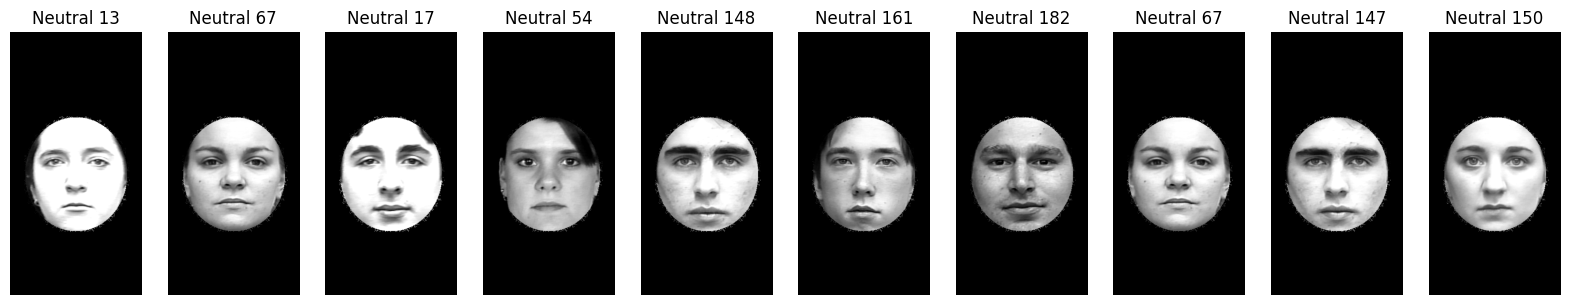

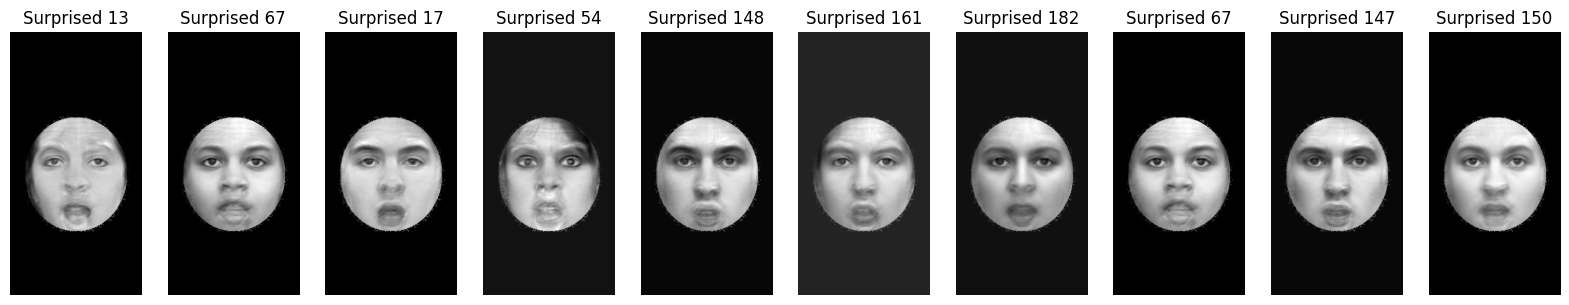

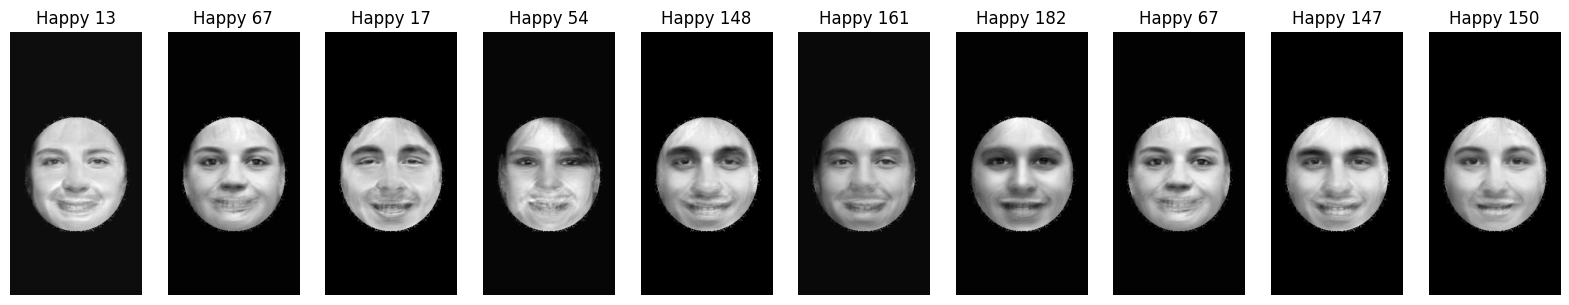

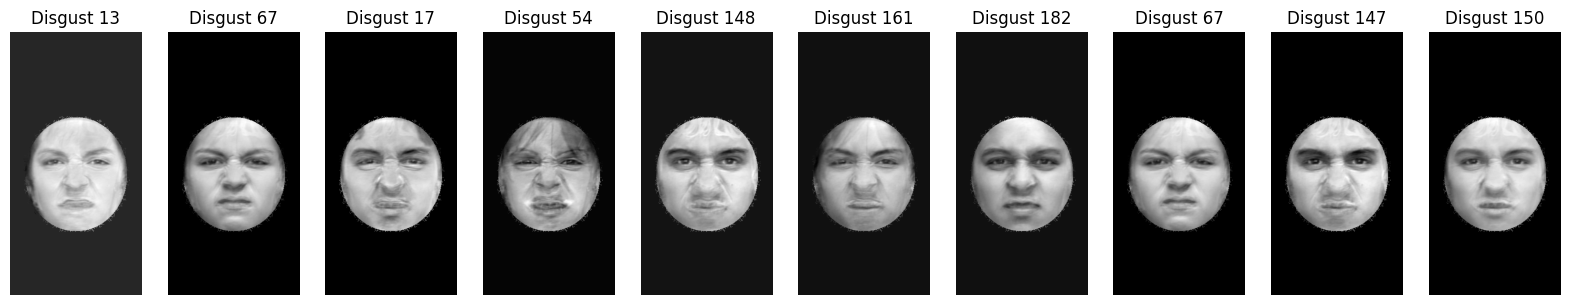

In [14]:
#using random to choose the pictures to reconstruct
index = np.random.randint(190, size=10)

#plotting the neutral version
plt.figure(figsize=(20,20))
j = 1
for i in index:
    img=norm_img_m[i].reshape(N1,N2)
    plt.subplot(1, 10, j)
    plt.title('Neutral '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    j += 1

#projecting the neutral version to one of the feelings subspace and plotting the new version
X=pca_sup.transform(norm_img_m)   
Y=pca_sup.inverse_transform(X)
plt.figure(figsize=(20,20))
j = 1
for i in index:
    img=Y[i].reshape(N1,N2)
    plt.subplot(1, 10, j)
    plt.title('Surprised '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    j += 1
    
X=pca_hap.transform(norm_img_m)   
Y=pca_hap.inverse_transform(X)
plt.figure(figsize=(20,20))
j = 1
for i in index:
    img=Y[i].reshape(N1,N2)
    plt.subplot(1, 10, j)
    plt.title('Happy '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    j += 1
    
X=pca_disg.transform(norm_img_m)   
Y=pca_disg.inverse_transform(X)
plt.figure(figsize=(20,20))
j = 1
for i in index:
    img=Y[i].reshape(N1,N2)
    plt.subplot(1, 10, j)
    plt.title('Disgust '+str(1+i))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    j += 1

### با توجه به تصاویر بالا، مشاهده می‌شود که حاصل بازسازی تصویر در زیرفضای دیگر احساسات، چهره آن فرد با احساسی دیگر است. همچنین مشاهده می‌شود که تعجب و انزجار بهتر از خوشحالی بازسازی شده‌اند. دلیل آن می‌توان این باشد که در خنده دهان باز است و دندان‌ها دیده می‌شود، که در حالت عادی شخص مشخص نیست و در نتیجه در محدوده دهان بازسازی به خوبی انجام نمی‌پذیرد. به طور کلی چشم‌ها بهتر از بقیه‌ی اجزا بازسازی شده‌اند.